In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before running the scripts, please check that there's a **"data" folder** at the same level as the **"scripts" folder**. This folder should contain the dataset files needed for the code to work properly.  

In [ ]:
# Get the directory of the current script
script_dir = os.getcwd()

# Construct the file path dynamically
file_path = os.path.join(script_dir, "..", "data", "processed_dataset.csv")

# Load the dataset
df = pd.read_csv(file_path, low_memory=False)

# Fill missing numerical values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\3867834735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=energy_trend.index, y=energy_trend.values, palette="magma")


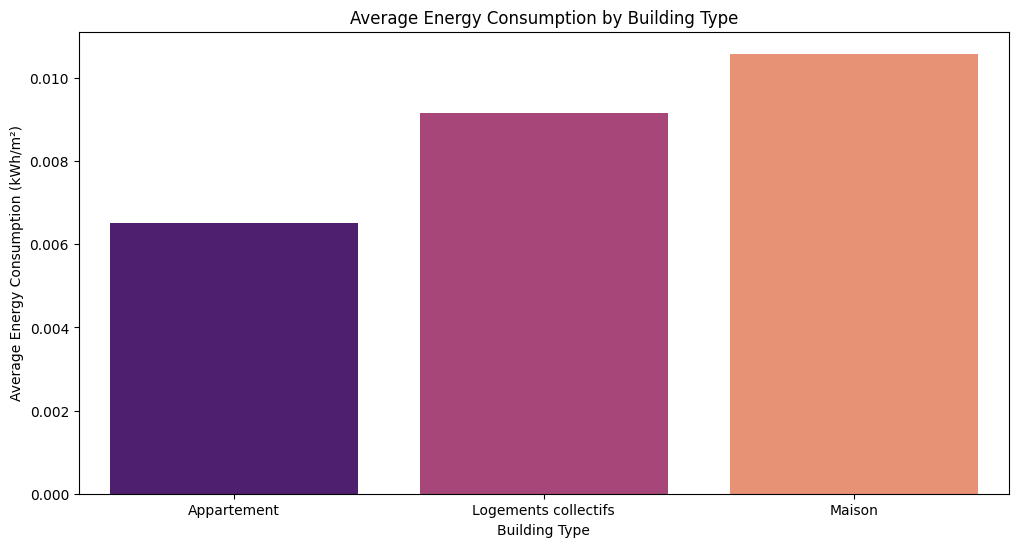

In [27]:
# 1. 📌 Analyze Energy Consumption Trends

# Group by building type and calculate mean energy consumption
energy_trend = df.groupby("tr002_type_batiment_libelle")["consommation_energie"].mean().sort_values()

# Plot energy consumption by building type
plt.figure(figsize=(12, 6))
sns.barplot(x=energy_trend.index, y=energy_trend.values, palette="magma")
plt.xticks(rotation=0)
plt.xlabel("Building Type")
plt.ylabel("Average Energy Consumption (kWh/m²)")
plt.title("Average Energy Consumption by Building Type")
plt.savefig("energy_consumption_trend.png")
plt.show()



C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\3149969274.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cost_effective.index, y=top_cost_effective.values, palette="magma")


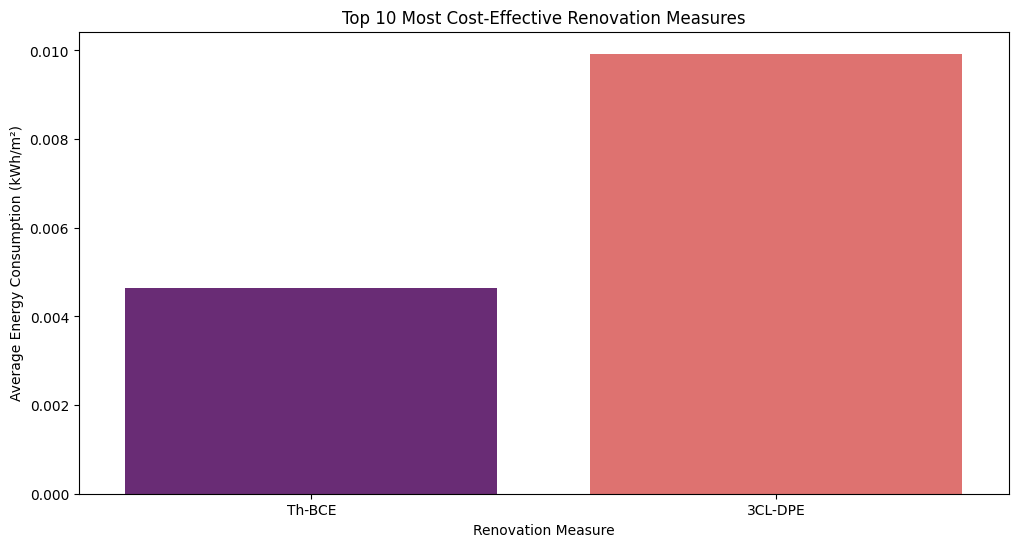

In [28]:
# 2. 📌 # Cost-Effective Renovation Measures (Energy Savings per Cost Unit)
df["consommation_energie"] = pd.to_numeric(df["consommation_energie"], errors="coerce")

# Compute cost-effectiveness metric (assuming energy savings per renovation method)
cost_effectiveness = df.groupby("nom_methode_dpe")["consommation_energie"].mean().sort_values()

# Select top 10 most effective renovation measures (smallest energy consumption)
top_cost_effective = cost_effectiveness.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cost_effective.index, y=top_cost_effective.values, palette="magma")
plt.xticks(rotation=0)
plt.xlabel("Renovation Measure")
plt.ylabel("Average Energy Consumption (kWh/m²)")
plt.title("Top 10 Most Cost-Effective Renovation Measures")
plt.savefig("cost_effective_measures.png")
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\2054693541.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_financial_efficiency.index, y=top_financial_efficiency.values, palette="magma")


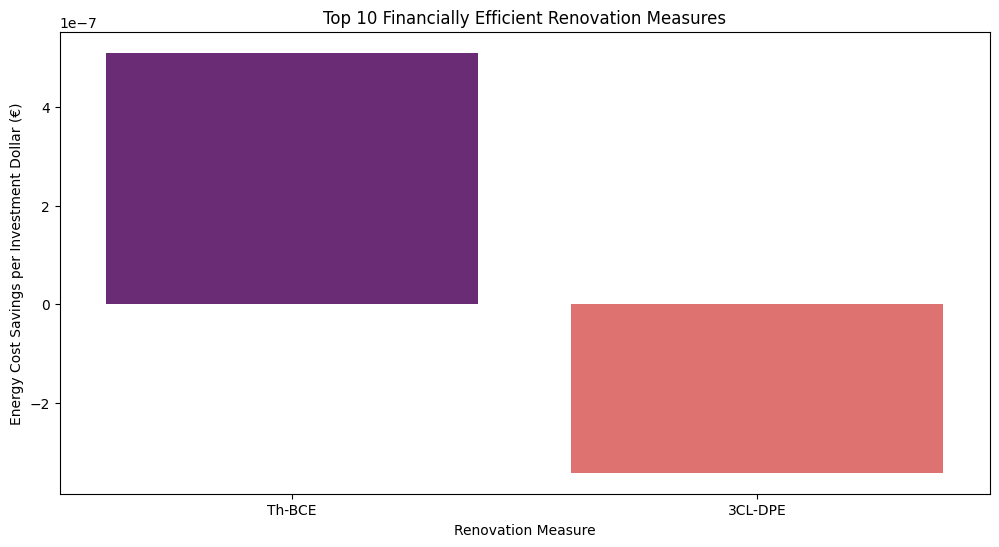

In [29]:
# 3. 📌 Financially Efficient Renovation Measures (Energy Cost Savings per Investment Dollar)

# Ensure "consommation_energie" is numeric
df["consommation_energie"] = pd.to_numeric(df["consommation_energie"], errors="coerce")

# Step 1: Estimate Energy Savings (difference from mean energy consumption)
df["energy_saved"] = df["consommation_energie"].mean() - df["consommation_energie"]

# Step 2: Estimate energy cost savings (using assumed price per kWh)
ENERGY_PRICE_PER_KWH = 0.18
df["energy_cost_savings"] = df["energy_saved"] * ENERGY_PRICE_PER_KWH

# Step 3: Map renovation costs based on the method used (real values should replace this mapping)
renovation_costs = {
    "3CL-DPE": 1000,
    "RT2012": 1500,
    "Th-BCE": 1200
}
df["renovation_cost"] = df["nom_methode_dpe"].map(renovation_costs)

# Convert renovation cost to numeric
df["renovation_cost"] = pd.to_numeric(df["renovation_cost"], errors="coerce")

# Remove entries with missing or zero renovation cost (to avoid division errors)
df = df[df["renovation_cost"] > 0]

# Compute financial efficiency (Energy Cost Savings per Investment €)
df["financial_efficiency"] = df["energy_cost_savings"] / df["renovation_cost"]

# Aggregate per renovation method
financial_efficiency = df.groupby("nom_methode_dpe")["financial_efficiency"].mean().sort_values(ascending=False)

# Select top 10 financially efficient renovation measures
top_financial_efficiency = financial_efficiency.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_financial_efficiency.index, y=top_financial_efficiency.values, palette="magma")
plt.xticks(rotation=0)
plt.xlabel("Renovation Measure")
plt.ylabel("Energy Cost Savings per Investment Dollar (€)")
plt.title("Top 10 Financially Efficient Renovation Measures")
plt.savefig("financially_efficient_measures.png")
plt.show()

c:\Users\Elite\Documents\competitions.desights.ai\Net_Zero_France\virtual_env\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Elite\Documents\competitions.desights.ai\Net_Zero_France\virtual_env\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\457806193.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=element_impact.index, y=element_impact.values, palette="magma")


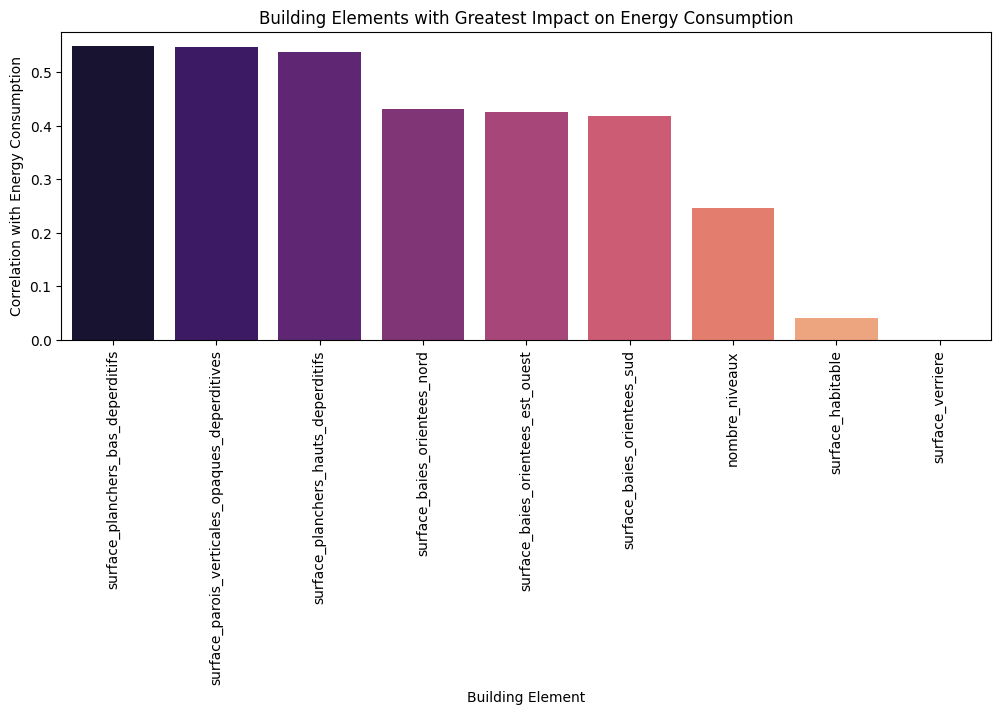

In [30]:
# 4. 📌 Impact of Building Elements on Energy Consumption

building_elements = ["surface_habitable", "nombre_niveaux", "surface_verriere", "surface_baies_orientees_nord", 
                     "surface_baies_orientees_est_ouest", "surface_baies_orientees_sud", 
                     "surface_planchers_hauts_deperditifs", "surface_planchers_bas_deperditifs", 
                     "surface_parois_verticales_opaques_deperditives"]

element_impact = df[building_elements].corrwith(df["consommation_energie"]).abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 4))
sns.barplot(x=element_impact.index, y=element_impact.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Building Element")
plt.ylabel("Correlation with Energy Consumption")
plt.title("Building Elements with Greatest Impact on Energy Consumption")
plt.savefig("building_elements_impact.png")
plt.show()



C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\2295465168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classe_consommation_energie', order=order, palette="magma")


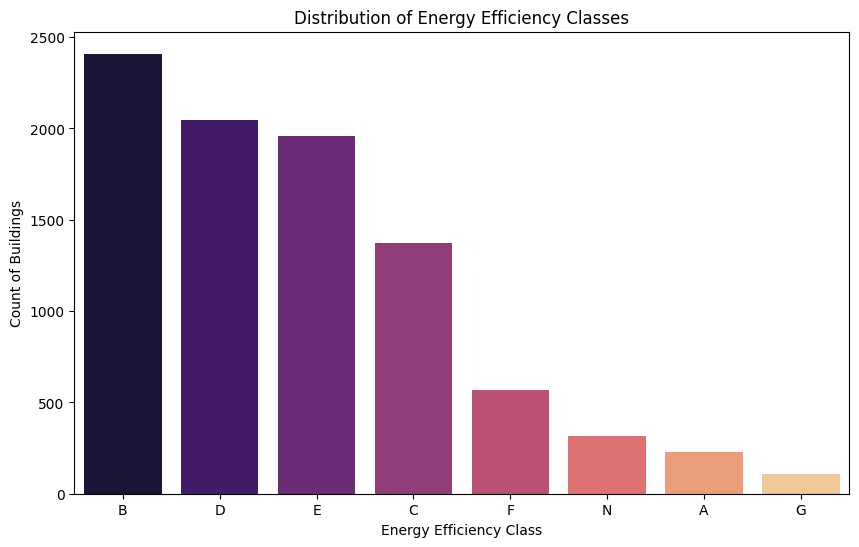

In [31]:

# 5. 📌 Energy Efficiency Class Distribution 

if "classe_consommation_energie" in df.columns:
    plt.figure(figsize=(10, 6))
    order = df['classe_consommation_energie'].value_counts().index
    sns.countplot(data=df, x='classe_consommation_energie', order=order, palette="magma")
    plt.xlabel("Energy Efficiency Class")
    plt.ylabel("Count of Buildings")
    plt.title("Distribution of Energy Efficiency Classes")
    plt.savefig("energy_efficiency_distribution.png")
    plt.show()

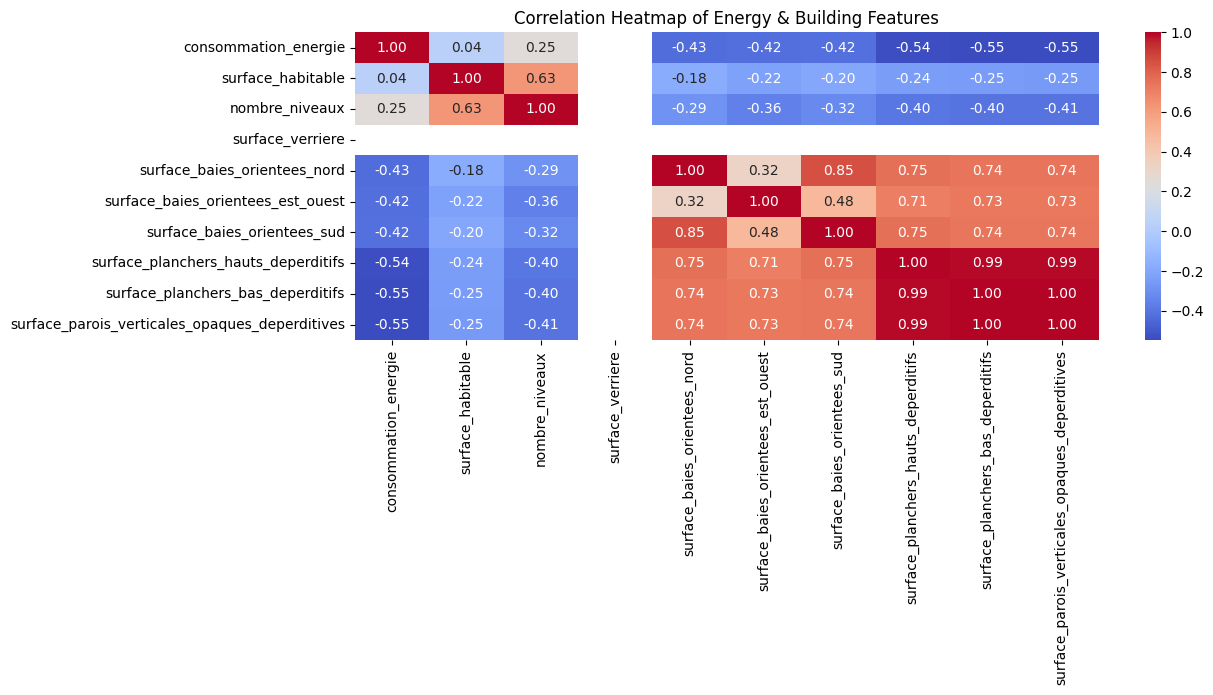

In [17]:
# 6. 📌 Correlation Heatmap #

# Select a subset of columns including energy consumption and building characteristics.
heatmap_cols = [
    "consommation_energie", "surface_habitable", "nombre_niveaux", "surface_verriere",
    "surface_baies_orientees_nord", "surface_baies_orientees_est_ouest", "surface_baies_orientees_sud",
    "surface_planchers_hauts_deperditifs", "surface_planchers_bas_deperditifs",
    "surface_parois_verticales_opaques_deperditives"
]
# Filter columns that exist in the dataset.
heatmap_cols = [col for col in heatmap_cols if col in df.columns]

plt.figure(figsize=(12, 4))
corr_matrix = df[heatmap_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Energy & Building Features")
plt.savefig("correlation_heatmap.png")
plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\2395472606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="tv016_departement_departement", y="consommation_energie", data=region_consumption, palette="magma")


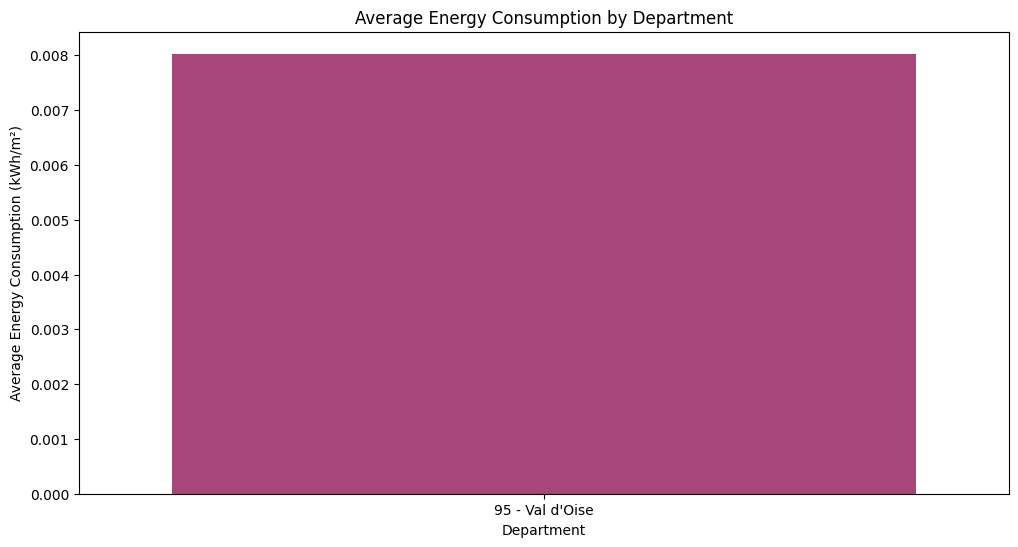

In [32]:
# 7. 📌 Geographical Analysis of Energy Consumption 
if "tv016_departement_departement" in df.columns:
    region_consumption = df.groupby("tv016_departement_departement")["consommation_energie"].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x="tv016_departement_departement", y="consommation_energie", data=region_consumption, palette="magma")
    plt.xlabel("Department")
    plt.ylabel("Average Energy Consumption (kWh/m²)")
    plt.title("Average Energy Consumption by Department")
    plt.xticks(rotation=0)
    plt.savefig("energy_consumption_by_department.png")
    plt.show()

C:\Users\Elite\AppData\Local\Temp\ipykernel_11616\2410144923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="renovated", y="consommation_energie", data=df, palette="magma")


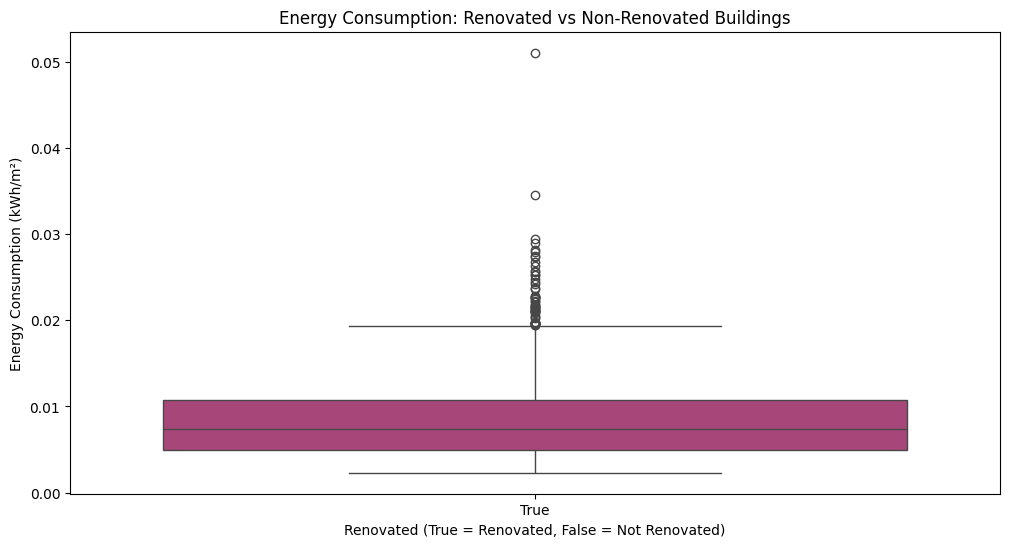

In [33]:
# 8. 📌 Renovation Impact: Renovated vs Non-Renovated #
#############################################
# Assume that if 'nom_methode_dpe' is not null, the building underwent renovation.
df["renovated"] = df["nom_methode_dpe"].notnull()

plt.figure(figsize=(12, 6))
sns.boxplot(x="renovated", y="consommation_energie", data=df, palette="magma")
plt.xlabel("Renovated (True = Renovated, False = Not Renovated)")
plt.ylabel("Energy Consumption (kWh/m²)")
plt.title("Energy Consumption: Renovated vs Non-Renovated Buildings")
plt.savefig("renovation_impact.png")
plt.show()
